# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['kapaa',
 'pevek',
 'barrow',
 'alyangula',
 'belushya guba',
 'butaritari',
 'hermanus',
 'tondi',
 'dikson',
 'saskylakh',
 'hilo',
 'mataura',
 'ushuaia',
 'bethel',
 'zharkent',
 'mahebourg',
 'illoqqortoormiut',
 'kasempa',
 'beitbridge',
 'najran',
 'caravelas',
 'punta arenas',
 'yellowknife',
 'albany',
 'zhengjiatun',
 'buala',
 'limulunga',
 'puerto ayora',
 'arraial do cabo',
 'bluff',
 'constitucion',
 'hobart',
 'faya',
 'sumbawa',
 'kincardine',
 'tasiilaq',
 'busselton',
 'luderitz',
 'larsnes',
 'qaanaaq',
 'seoni malwa',
 'nizhniy kuranakh',
 'pinheiro',
 'vestmannaeyjar',
 'vaini',
 'suluktu',
 'buraydah',
 'ajdabiya',
 'coahuayana',
 'inuvik',
 'ribeira grande',
 'zabol',
 'santa maria del oro',
 'rikitea',
 'ostrovnoy',
 'port elizabeth',
 'victoria',
 'atuona',
 'khuzhir',
 'clyde river',
 'naze',
 'tura',
 'tsihombe',
 'cairns',
 'rawson',
 'sentyabrskiy',
 'flinders',
 'olavarria',
 'taolanaro',
 'powell river',
 'oum hadjer',
 'chuy',
 'san francisco',
 'mae ho

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
df = pd.Series(cities)
df = df.to_frame()
df["Lat"] = ""
df["Lng"] = ""
df["Max Temp"] = ""
df["Humidity"] = ""
df["Cloudiness"] = ""
df["Wind Speed"] = ""
df["Country"] = ""
df["Date"] = ""
df = df.rename(columns={0: "City"})
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,,,,,,,,
1,pevek,,,,,,,,
2,barrow,,,,,,,,
3,alyangula,,,,,,,,
4,belushya guba,,,,,,,,
...,...,...,...,...,...,...,...,...,...
608,los llanos de aridane,,,,,,,,
609,jhol,,,,,,,,
610,miyang,,,,,,,,
611,brookhaven,,,,,,,,


In [4]:
params = {"dt" : "dt",
          "units": "Imperial",
         "appid" : weather_api_key}
base_url = "http://api.openweathermap.org/data/2.5/weather"
counter = 1
set_ = 1
print("Beginning Data Retrieval")
print("-----------------------------")
for index, row in df.iterrows():
    
    if counter > 50:
        counter = 1
        set_ = set_ + 1
        
    cities = row["City"]
    print(f"Processing Record {counter} of Set {set_} | {cities}")
    
    params["q"] = cities
    
    request_api = requests.get(base_url, params=params).json()

    try:
        df.loc[index, "Lat"] = request_api["coord"]["lat"]
        df.loc[index, "Lng"] = request_api["coord"]["lon"]
        df.loc[index, "Max Temp"] = request_api["main"]["temp_max"]
        df.loc[index, "Humidity"] = request_api["main"]["humidity"]
        df.loc[index, "Cloudiness"] = request_api["clouds"]["all"]
        df.loc[index, "Wind Speed"] = request_api["wind"]["speed"]
        df.loc[index, "Country"] = request_api["sys"]["country"]
        df.loc[index, "Date"] = request_api["dt"]
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    counter = counter + 1
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | alyangula
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | tondi
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | zharkent
Processing Record 16 of Set 1 | mahebourg
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | kasempa
Processing Record 19 of Set 1 | beitbridge
Processing Record 20 of Set 1 | najran
Processing Record 21 of Set 1 | caravelas
Processing Record 22 of Set 1 | punta ar

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.08,-159.32,73.4,73,40,13.87,US,1589126037
1,pevek,69.7,170.31,34.12,87,68,14.07,RU,1589126037
2,barrow,71.29,-156.79,21.2,92,1,5.82,US,1589126037
3,alyangula,-13.85,136.42,73.4,94,5,1.12,AU,1589126037
4,belushya guba,,,,,,,,
...,...,...,...,...,...,...,...,...,...
608,los llanos de aridane,28.66,-17.92,75.2,64,20,19.46,ES,1589126157
609,jhol,25.96,68.89,98.6,47,0,11.41,PK,1589126157
610,miyang,24.4,103.44,68.68,54,0,2.59,CN,1589126157
611,brookhaven,31.58,-90.44,69.01,70,20,5.57,US,1589125883


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
df["Lng"] = pd.to_numeric(df["Lng"])
df["Max Temp"] = pd.to_numeric(df["Max Temp"])
df["Lat"] = pd.to_numeric(df["Lat"])
df["Cloudiness"] = pd.to_numeric(df["Cloudiness"])
df["Wind Speed"] = pd.to_numeric(df["Wind Speed"])
df["Humidity"] = pd.to_numeric(df["Humidity"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        613 non-null    object 
 1   Lat         567 non-null    float64
 2   Lng         567 non-null    float64
 3   Max Temp    567 non-null    float64
 4   Humidity    567 non-null    float64
 5   Cloudiness  567 non-null    float64
 6   Wind Speed  567 non-null    float64
 7   Country     613 non-null    object 
 8   Date        613 non-null    object 
dtypes: float64(6), object(3)
memory usage: 43.2+ KB


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
df = df.round(2)
df = df.dropna()
clean_city_data = df.loc[df["Humidity"] < 101].reset_index()
clean_city_data = clean_city_data[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed", "Country", "Date"]]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.08,-159.32,73.40,73.0,40.0,13.87,US,1589126037
1,pevek,69.70,170.31,34.12,87.0,68.0,14.07,RU,1589126037
2,barrow,71.29,-156.79,21.20,92.0,1.0,5.82,US,1589126037
3,alyangula,-13.85,136.42,73.40,94.0,5.0,1.12,AU,1589126037
4,butaritari,3.07,172.79,82.62,78.0,18.0,7.99,KI,1589126038
...,...,...,...,...,...,...,...,...,...
562,bloomingdale,27.89,-82.24,75.99,94.0,90.0,10.29,US,1589125995
563,los llanos de aridane,28.66,-17.92,75.20,64.0,20.0,19.46,ES,1589126157
564,jhol,25.96,68.89,98.60,47.0,0.0,11.41,PK,1589126157
565,miyang,24.40,103.44,68.68,54.0,0.0,2.59,CN,1589126157


In [8]:
# Extract relevant fields from the data frame
clean_city_data.to_csv(output_data_file)

# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

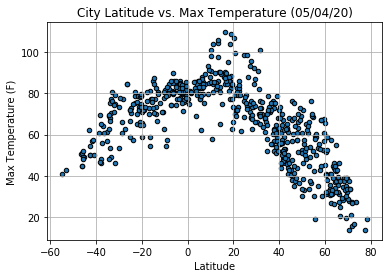

In [9]:
LatvT = clean_city_data.plot(kind="scatter",
                             x="Lat", 
                             y="Max Temp", 
                             title="City Latitude vs. Max Temperature (05/04/20)", 
                             grid=True,
                             edgecolors="black")
LatvT.set_xlabel("Latitude")
LatvT.set_ylabel("Max Temperature (F)")
plt.savefig('../Images/Latitude_vs_Max_Temp.png')
LatvT

## Latitude vs. Humidity Plot

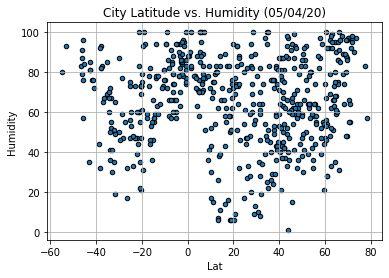

In [10]:
LatvH = clean_city_data.plot(kind="scatter",
                             x="Lat", 
                             y="Humidity", 
                             title="City Latitude vs. Humidity (05/04/20)", 
                             grid=True,
                             edgecolors="black")
LatvT.set_xlabel("Latitude")
LatvT.set_ylabel("Humidity (%)")
plt.savefig('../Images/Latitude_vs_Humidity.png')
LatvH

## Latitude vs. Cloudiness Plot

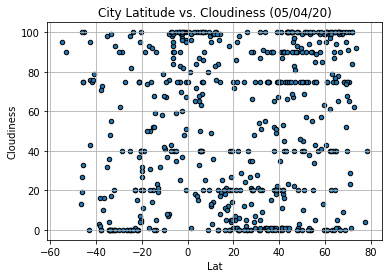

In [11]:
LatvC = clean_city_data.plot(kind="scatter",
                             x="Lat", 
                             y="Cloudiness", 
                             title="City Latitude vs. Cloudiness (05/04/20)",
                             grid=True,
                             edgecolors="black")
LatvT.set_xlabel("Latitude")
LatvT.set_ylabel("Cloudiness (%)")
plt.savefig('../Images/Latitude_vs_Cloudiness.png')
LatvC

## Latitude vs. Wind Speed Plot

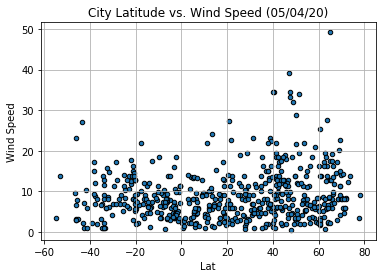

In [12]:
LatvW = clean_city_data.plot(kind="scatter",
                             x="Lat", 
                             y="Wind Speed", 
                             title="City Latitude vs. Wind Speed (05/04/20)",
                             grid=True,
                             edgecolors="black")
LatvT.set_xlabel("Latitude")
LatvT.set_ylabel("Wind Speed (mph)")
plt.savefig('../Images/Latitude_vs_Wind_Speed.png')
LatvW

## Linear Regression

In [13]:
North = clean_city_data.loc[clean_city_data["Lat"] > 0]
North = North.reset_index()
North = North[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
South = clean_city_data.loc[clean_city_data["Lat"] < 0]
South = South.reset_index()
South = South[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
South

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,alyangula,-13.85,136.42,73.40,94.0,5.0,1.12,AU,1589126037
1,hermanus,-34.42,19.23,69.01,70.0,0.0,0.92,ZA,1589126038
2,mataura,-46.19,168.86,44.58,91.0,19.0,3.27,NZ,1589126039
3,ushuaia,-54.80,-68.30,41.00,80.0,95.0,3.36,AR,1589125943
4,mahebourg,-20.41,57.70,73.40,73.0,40.0,12.75,MU,1589126040
...,...,...,...,...,...,...,...,...,...
169,gamba,-2.65,10.00,75.25,95.0,100.0,5.82,GA,1589126153
170,mount isa,-20.73,139.50,64.40,22.0,7.0,13.87,AU,1589126155
171,buri,-23.80,-48.59,74.82,48.0,0.0,6.35,BR,1589126156
172,honiara,-9.43,159.95,78.80,94.0,75.0,3.36,SB,1589126156


In [14]:
# OPTIONAL: Create a function to create Linear Regression plots
from scipy import stats
def SOLS(data,x,y):
    x_values = data[x]
    y_values = data[y]
    x_mean = data[x].mean()
    y_mean = data[y].mean()
    xcol = data[[x]]
    xcol = list(xcol.columns)
    ycol = data[[y]]
    ycol = list(ycol.columns)    
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    rsquare = rvalue**2
    print(f" The r-squared is: {rsquare}")
    plt.scatter(x_values,y_values)
    plt.xlabel(xcol[0])
    plt.ylabel(ycol[0])
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values, "red")
    plt.annotate(line_eq,xy=(x_mean, y_mean),fontsize=15,color="red")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-squared is: 0.7155928513662063


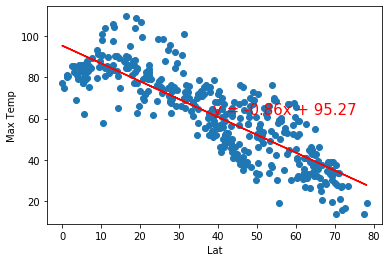

In [15]:
SOLS(North, "Lat", "Max Temp")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-squared is: 0.5806612466194588


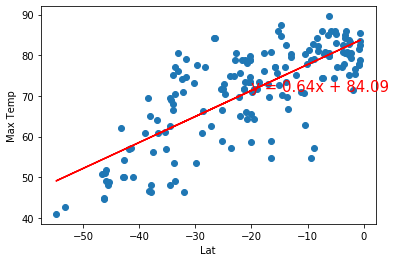

In [16]:
SOLS(South, "Lat", "Max Temp")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-squared is: 0.007999344061609362


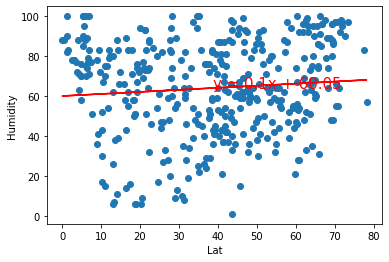

In [17]:
SOLS(North, "Lat", "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-squared is: 0.05676994587502545


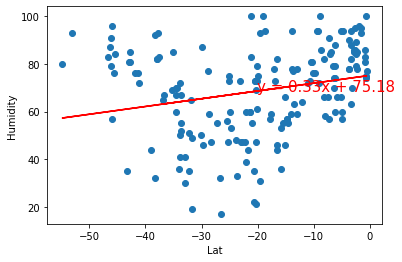

In [18]:
SOLS(South, "Lat", "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-squared is: 0.032249166453496604


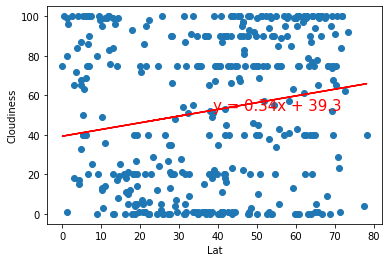

In [19]:
SOLS(North, "Lat", "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-squared is: 0.08604142204511832


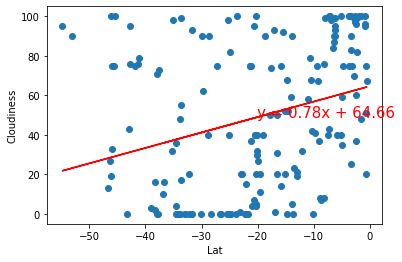

In [20]:
SOLS(South, "Lat", "Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-squared is: 0.04140595886988923


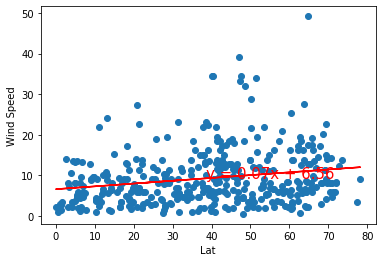

In [21]:
SOLS(North, "Lat", "Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-squared is: 0.0047420017416837995


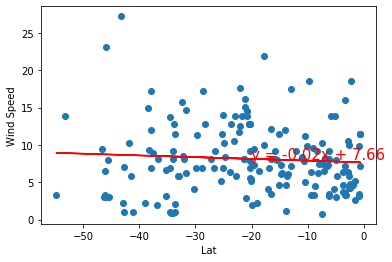

In [22]:
SOLS(South, "Lat", "Wind Speed")

In [23]:
#Observation 1
#Every time I rerun citipy library, it seems im getting different cities. I wonder if it is a random process, or if it is 
#possible to set the seed to have citipy produce same observations each time.

In [24]:
#Observation 2
#I think it is kind of pointless to be plotting line graphs of wind speed and cloudiness, since the slope values basically 
#tell us that the relationship is very weak. This is also obersvable in the  R^2 value. However, the scatter plot is always 
#helpful to visualize, since it sort of tells us how the clouds are actually looking at the moment.

In [25]:
#Observation 3
#People may think southern hemisphere is much warmer throughout the year, but in reality, Northern Hemisphere is warmer
#during the "normal" summer time in Northern Hemisphere. This is apparent by the City location cs Max temp graph, generally summarizing
#the temperature pretty well